# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

You should consider upgrading via the 'd:\anand\anpr\anprsys\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 70% [....................................................                      ] 1040384 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

D:\Anand\ANPR\anprsys\lib\site-packages\setuptools\command\install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDeprecationWarning,
D:\Anand\ANPR\anprsys\lib\site-packages\setuptools\command\easy_install.py:147: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  EasyInstallDeprecationWarning,
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
D:\Anand\ANPR\anprsys\lib\site-packages\pkg_resources\__init__.py:125: PkgResourcesDeprecationWarning:  is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,
D

Obtaining file:///D:/Anand/ANPR/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


You should consider upgrading via the 'd:\anand\anpr\anprsys\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
#!pip list
!pip install scipy

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-01-03 21:54:22.990149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-01-03 21:54:22.990664: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-03 21:55:01.251235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-01-03 21:55:01.251362: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-03 21:55:01.264765: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Anand
2023-01-03 21:55:01.265035: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Anand
Running tests under Python 3.7.11: D:\Anand\ANPR\anprsys\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_cente

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [ ]:
!pip install pillow

In [ ]:
!pip install pyyaml

In [11]:
import object_detection

In [10]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ---------------------------------------------
absl-py                      0.15.0
asgiref                      3.5.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.0.0
certifi                      2021.10.8
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
Cython                       0.29.28
debugpy                      1.6.0
decorator                    5.1.1
Django                       3.2.12
easyocr                      1.3.2
entrypoints                  0.4
flatbuffers                  1.12
future                       0.18.2
gast                         0.3.3
gin-config                   0.5.0
google-auth                  2.6.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.32.0
h5py            

You should consider upgrading via the 'd:\anand\anpr\anprsys\scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

 30% [......................                                                  ]  6356992 / 20515344

 57% [.........................................                               ] 11812864 / 20515344

 67% [................................................                        ] 13836288 / 20515344

 76% [.......................................................                 ] 15785984 / 20515344

 85% [.............................................................           ] 17596416 / 20515344

 95% [.....................................................................   ] 19685376 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [11]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 --upgrade

You should consider upgrading via the 'd:\anand\anpr\anprsys\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [ ]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
!pip install pandas

In [13]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


Traceback (most recent call last):
  File "Tensorflow\scripts\generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "D:\Anand\ANPR\anprsys\lib\site-packages\tensorflow\python\platform\app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "D:\Anand\ANPR\anprsys\lib\site-packages\absl\app.py", line 312, in run
    _run_main(main, args)
  File "D:\Anand\ANPR\anprsys\lib\site-packages\absl\app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "Tensorflow\scripts\generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "Tensorflow\scripts\generate_tfrecord.py", line 112, in create_tf_example
    encoded_jpg = fid.read()
  File "D:\Anand\ANPR\anprsys\lib\site-packages\tensorflow\python\lib\io\file_io.py", line 114, in read
    self._preread_check()
  File "D:\Anand\ANPR\anprsys\lib\site-packages\tensorflow\python\lib\io\file_io.py", line 77, in _preread_check
    compat.path_to_

# 4. Copy Model Config to Training Folder

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [7]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [8]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [ ]:
config

In [9]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [10]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [11]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [59]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [43]:
!pip install lvis==0.5.3

You should consider upgrading via the 'd:\anand\anpr\anprsys\scripts\python.exe -m pip install --upgrade pip' command.


In [60]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [61]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [63]:
!{command}

2022-05-27 15:48:37.452076: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-27 15:48:37.452178: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-27 15:48:46.799917: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-05-27 15:48:46.799970: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-27 15:48:46.806788: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Anand
2022-05-27 15:48:46.807053: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Anand
2022-05-27 15:48:46.807909: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneA

# 7. Evaluate the Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [12]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [13]:
#prevent GPU complete consumption
gpus=tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    except RunTimeError as e:
        print(e)

In [14]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
!pip install opencv-python==4.5.1.48

In [ ]:
!pip install opencv-contrib-python
!pip install opencv-python

# 9. Detect from an Image

In [ ]:
!pip list

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
print(cv2.__version__)

4.5.1


In [16]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [17]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '2.jpg')

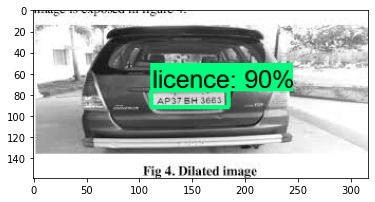

In [18]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'c6.jpg')
    

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
    
    

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

    # detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

det_veh_img=plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:

#Apply easy ocr
!pip  install easyocr==1.3.2
#!pip list

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
!pip install pytesseract

In [ ]:
!pip list

In [19]:
#!pip install easyocr
import easyocr

In [20]:

detection_threshold=0.7

In [21]:
image=image_np_with_detections
scores=list(filter(lambda x:x> detection_threshold,detections['detection_scores']))
boxes=detections['detection_boxes'][:len(scores)]
classes=detections['detection_classes'][:len(scores)]

In [22]:
boxes

array([[0.48092738, 0.35191312, 0.57597286, 0.58611465]], dtype=float32)

In [23]:
width=image.shape[1]
height=image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.48092738 0.35191312 0.57597286 0.58611465]
[ 76.46745309 111.55646041  91.57968396 185.79834247]
[([[5, 3], [71, 3], [71, 15], [5, 15]], 'AP3IBh 3663', 0.09557808466307008)]


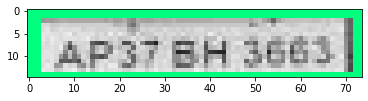

In [24]:
for idx,box in enumerate(boxes):
    print(box)
    roi=box*[height,width,height,width]
    print(roi)
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader=easyocr.Reader(['en'])
    ocr_result=reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))

In [26]:
for result in ocr_result:
    print(result)

([[5, 3], [71, 3], [71, 15], [5, 15]], 'AP3IBh 3663', 0.09557808466307008)


In [25]:
region_threshold=0.05

In [26]:
def filter_text(region,ocr_result,region_threshold):
    rectangle_size=region.shape[0]*region.shape[1]
    plate=[]
    for result in ocr_result:
        length=np.sum(np.subtract(result[0][1],result[0][0]))
        height=np.sum(np.subtract(result[0][2],result[0][1]))
        
        if length*height/rectangle_size>region_threshold:
            plate.append(result[1])
    return plate

In [27]:
filter_text(region,ocr_result,region_threshold)

['AP3IBh 3663']

In [28]:
def ocr_it(image,detections,detection_threshold,region_threshold):
    scores=list(filter(lambda x:x> detection_threshold,detections['detection_scores']))
    boxes=detections['detection_boxes'][:len(scores)]
    classes=detections['detection_classes'][:len(scores)]
    width=image.shape[1]
    height=image.shape[0]
    for idx,box in enumerate(boxes):
        roi=box*[height,width,height,width]
        region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader=easyocr.Reader(['en'])
        ocr_result=reader.readtext(region)
        
        text=filter_text(region,ocr_result,region_threshold)
        plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))
        print(text)
        return text,region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['AP3IBh 3663']


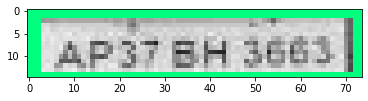

In [29]:
text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)

# 10. Real Time Detections from your Webcam

In [42]:
ocr_result

[([[17, 9], [97, 9], [97, 25], [17, 25]], 'DL49 AK49', 0.6351242320389758)]

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    try:
        text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
        img_path=save_results(text,region,'realtimedetection_results.csv','Detection_Images')
    except:
        pass
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Web Cam Detection Function

In [30]:
def cam_detect():
    cap = cv2.VideoCapture(0)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    while cap.isOpened():
        ret, frame = cap.read()
        image_np = np.array(frame)
    
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)
    
        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
        try:
            text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
            img_name=save_results(text,region,'realtimedetection_results.csv','Detection_Images')
        except:
            pass
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break
    return img_name,text

# Image Detection Function

In [31]:
def detect_img(img):
    category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
    #IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '2.jpg')
    

    img = cv2.imread(img)
    image_np = np.array(img)
    
    

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

    det_veh_img=plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    final_det_img=cv2.imwrite('final_det_img.jpg',image_np_with_detections)
    print(os.getcwd())
    plt.show()
    text,region=ocr_it(image_np_with_detections,detections,detection_threshold,region_threshold)
    return text,region

# GUI Implementation

D:\Anand\ANPR


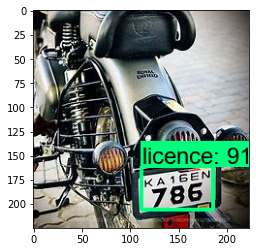

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['KAISEN', '786']


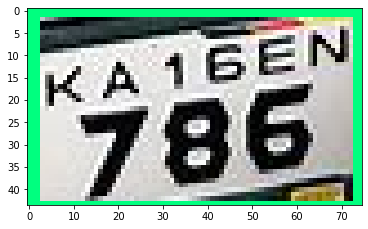

In [32]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk


my_w = tk.Tk()
my_w.geometry("900x1000")  # Size of the window 
my_w.title('Vehicle Number Plate Detector')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='Upload Vehicle Image',width=30,font=my_font1,justify='center')  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

l2 = tk.Label(my_w,text='Real-Time Detection From Webcam',width=30,font=my_font1,justify='center')  
l2.grid(row=1,column=3)
b2 = tk.Button(my_w, text='open cam', 
   width=20,command = lambda:webcam_detect())
b2.grid(row=2,column=3) 





def webcam_detect():
    
    global detect_img
    
    img_name,text=cam_detect()
    
    path=r'D:\Anand\ANPR\Detection_Images'
    
    img_path=os.path.join(path,img_name)
        
    
    detect_img=Image.open(img_path)
    img_resize=detect_img.resize((400,200)) # new width & height
    detect_img=ImageTk.PhotoImage(img_resize)
    b =tk.Button(my_w,image=detect_img) # using Button 
    b.grid(row=4,column=3)
    
    number_plate=''
    for i in text:
            number_plate+=i
    
    l = tk.Label(my_w,text='Vehicle Number Plate:'+number_plate,width=30,font=my_font1)  
    l.grid(row=6,column=3)

def img_detect(veh_img):
    global detected_plate_img
    global detected_number_plate
    
    text,region=detect_img(veh_img)
    
    path='D:\Anand\ANPR'
    
    detected_number_plate=Image.fromarray(region)
    plate_img_resized=detected_number_plate.resize((400,200)) # new width & height
    detected_number_plate=ImageTk.PhotoImage(plate_img_resized)
    b1 =tk.Button(my_w,image=detected_number_plate) # using Button 
    b1.grid(row=5,column=1)
    
    detected_plate_img=Image.open(r'D:\Anand\ANPR\final_det_img.jpg')
    img_resize=detected_plate_img.resize((400,200)) # new width & height
    detected_plate_img=ImageTk.PhotoImage(img_resize)
    #plate_img =  ImageTk.PhotoImage(image=Image.open(r'D:\Anand\ANPR\final_det_img.jpg'))
    b2 =tk.Button(my_w,image=detected_plate_img) # using Button 
    b2.grid(row=4,column=1)
    
    
    number_plate=''
    for i in text:
            number_plate+=i
    
    l = tk.Label(my_w,text='Vehicle Number Plate:'+number_plate,width=30,font=my_font1)  
    l.grid(row=6,column=1)
def upload_file():
    
    global img
    
    f_types = [('Jpg Files', '*.jpg'),('PNG Files','*.png')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    img_resized=img.resize((400,200)) # new width & height
    img=ImageTk.PhotoImage(img_resized)
    b =tk.Button(my_w,image=img,command=img_detect(filename)) # using Button 
    b.grid(row=3,column=1)
my_w.mainloop()


# Saving Results into a folder

In [34]:
import csv
import uuid

In [35]:
'{}.jpg'.format(uuid.uuid1())

'4c934d00-dda0-11ec-b976-f8b46a15ecaf.jpg'

In [36]:
def save_results(text,region,csv_filename,folder_path):
    img_name='{}.jpg'.format(uuid.uuid1())
    cv2.imwrite(os.path.join(folder_path,img_name),region)
    with open(csv_filename,mode='a',newline='') as f:
        csv_writer=csv.writer(f,delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name,text])
    return img_name

In [37]:
save_results(text,region,'detection_results.csv','Detection_Images')

'4d43f0da-dda0-11ec-a741-f8b46a15ecaf.jpg'